## Готовим данные

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('02_titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [5]:
df = df[~df['Age'].isnull()]

In [6]:
df.shape

(714, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [8]:
y = df['Survived']

In [9]:
df = df.drop(['Survived'], axis=1)

## А где же машинное обучение?

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(df, y)
predict = dtc.predict(df)

In [15]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [12]:
predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [17]:
# Но как сравнить? Как понять хорошо мы отработали или не очень?
from sklearn.metrics import accuracy_score
accuracy_score(y, predict)

1.0

![Image](http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png)

In [18]:
from sklearn.cross_validation import train_test_split

/home/alekum/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

In [55]:
accuracy_score(y_test, predict)

0.6059322033898306

In [56]:
predict

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)

In [57]:
from sklearn.metrics import precision_score, recall_score

In [58]:
precision_score(y_test, predict)

0.5288461538461539

In [59]:
recall_score(y_test, predict)

0.5555555555555556

In [38]:
## Так ли хорошо работает модель?

In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
from sklearn.metrics import accuracy_score, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.5288461538461539
recall 0.5555555555555556
accuracy 0.6059322033898306
f1 0.5418719211822659


In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.6753246753246753
recall 0.5252525252525253
accuracy 0.6949152542372882


In [63]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict_proba(X_test)

In [64]:
predict

array([[0.8, 0.2],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.3, 0.7],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.5, 0.5],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.5, 0.5],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.1,

In [67]:
predict[:,1]

array([0.2, 0.9, 0.6, 0.7, 0. , 1. , 0.2, 0.4, 0.2, 0.2, 0.4, 0.1, 0.8,
       0.1, 0.8, 0.6, 0.3, 0.9, 0.5, 0.7, 0.1, 0.5, 0.8, 0.9, 0.3, 0.8,
       0.8, 0.4, 0.7, 0.1, 0.3, 0.4, 0.5, 0. , 0.2, 0. , 0.5, 0. , 0.1,
       0.3, 0.7, 0.2, 1. , 0.4, 0.8, 0.1, 0.5, 0.3, 0.5, 0.5, 0.8, 0.5,
       0.9, 0.3, 0.3, 0.3, 0.6, 0.3, 0. , 0.2, 0.3, 0.1, 0.3, 0.1, 0. ,
       0.3, 0.8, 0.8, 0.1, 0.4, 0.3, 0.8, 0.3, 0.2, 0.2, 0.1, 0. , 0. ,
       0. , 0.8, 0. , 0.9, 0.2, 0.8, 0.1, 0.1, 0. , 0. , 0.4, 0.3, 0.2,
       0.8, 0.6, 0.2, 0.5, 0.1, 0.8, 1. , 0.7, 0.3, 0.8, 0.4, 0. , 0.3,
       1. , 0.2, 0. , 1. , 0.7, 0.1, 0.6, 0.1, 0.3, 0.2, 0.2, 0.5, 0.2,
       0.6, 0.4, 0.1, 0.5, 0. , 0.5, 0. , 0.8, 0.1, 0.2, 0.6, 0.6, 0.2,
       0.5, 0.3, 0.4, 0.4, 0.3, 0.3, 0.1, 0.8, 0.1, 0.2, 0.2, 0.1, 0.7,
       0.4, 0.5, 0.3, 0. , 0.3, 0.7, 0.3, 0.6, 0.1, 0.1, 0.2, 1. , 0.3,
       0.2, 0.6, 0.9, 0.9, 0.4, 0.4, 0.4, 0.6, 0.4, 0.4, 0.8, 0.1, 0.3,
       0. , 0.1, 0.4, 0.1, 0.5, 1. , 0.5, 0.4, 0.3, 0.1, 0.3, 0.

In [69]:
from sklearn.metrics import precision_recall_curve

In [74]:
precision, recall, tresholds = precision_recall_curve(y_test, predict[:,1])

(-0.01, 1.01)

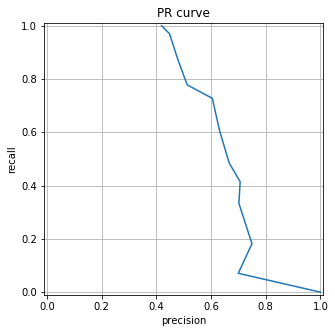

In [88]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))
plt.plot(precision, recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

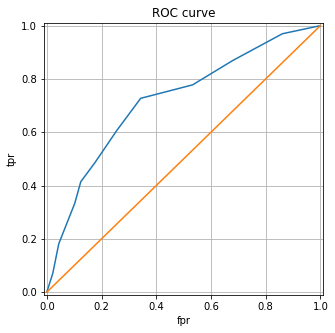

In [85]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([1.0, 0], [1.0, 0])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [87]:
roc_auc_score(y_test, predict[:,1])

0.7192361571923617

![Image](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [93]:
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.6074579 , 0.5701684 , 0.43544507, 0.65196472, 0.71059113,
       0.73891626, 0.80295567, 0.73973727, 0.75944171, 0.73522167])

## Вернемся к данным

In [94]:
df = pd.read_csv('02_titanic_train.csv')

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [96]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [98]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [99]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [100]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [121]:
df[df['Age'].isnull()]['Age'] = df['Age'].median()

In [122]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [123]:
df[df['Sex_male'] == 1].head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1


In [132]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.drop(['Survived'], axis=1), df['Survived'], test_size=0.33, random_state=42
)
rfc = RandomForestClassifier(n_estimators=10000)
rfc.fit(X_train2, y_train2)
predict2 = rfc.predict_proba(X_test2)

In [133]:
predict2.shape


(295, 2)

(-0.01, 1.01)

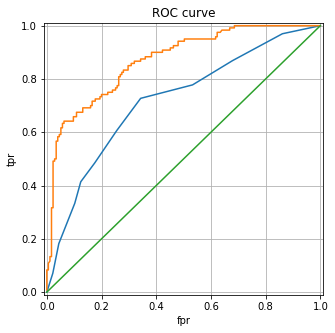

In [134]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y_test2, predict2[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot([1.0, 0], [1.0, 0])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [137]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict[:,1]), roc_auc_score(y_test2, predict2[:,1])

(0.7192361571923617, 0.8700476190476191)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [144]:
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    df.drop(['Survived'], axis=1),
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([0.72      , 0.79012987, 0.69197861, 0.77807487, 0.86203209,
       0.78101604, 0.77299465, 0.73181818, 0.80481283, 0.80991285])